In [1]:
from markov_bridges.configs.config_classes.generative_models.cmb_config import CMBConfig
from markov_bridges.configs.config_classes.data.basics_configs import GaussiansConfig
from markov_bridges.configs.config_classes.trainers.trainer_config import CMBTrainerConfig
from markov_bridges.configs.config_classes.networks.mixed_networks_config import MixedDeepMLPConfig
from markov_bridges.configs.config_classes.pipelines.pipeline_configs import CMBPipelineConfig
from markov_bridges.models.trainers.cmb_trainer import CMBTrainer
from markov_bridges.utils.experiment_files import ExperimentFiles
import matplotlib.pyplot as plt
import random 

model_config = CMBConfig(continuous_loss_type="drift")
model_config.data = GaussiansConfig(target_continuous_type="Ngaussian", 
                                    number_of_gaussians=8,
                                    has_context_discrete=False,
                                    has_target_discrete=False,
                                    batch_size=128,
                                    total_data_size=64000,
                                    train_data_size=51200,
                                    test_data_size=12800,)

model_config.mixed_network = MixedDeepMLPConfig(num_layers=3,
                                                hidden_dim=128,
                                                time_embed_dim=16,
                                                discrete_embed_dim=16
                                                )

model_config.trainer = CMBTrainerConfig(number_of_epochs=10,
                                        debug=False,
                                        learning_rate=1e-4)
model_config.trainer.metrics = []
model_config.pipeline = CMBPipelineConfig(number_of_steps=300, solver="ode_tau")
model_config.thermostat.gamma = 0.01
mdoel_config.sigma = 0.01
model_config.trainer.gpu = "cuda:1"

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


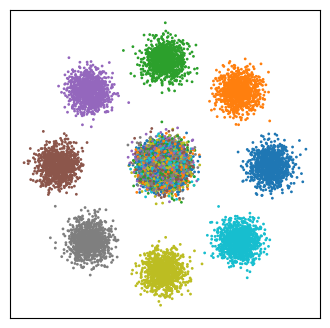

In [2]:
from markov_bridges.data.gaussians2D_dataloaders import GaussiansDataloader

dataloader = GaussiansDataloader(model_config.data)
data = dataloader.get_data_sample(sample_size=8000, train=True)

plt.figure(figsize=(4, 4))
plt.scatter(data.source_continuous[:, 0], data.source_continuous[:, 1], s=1, c=data.target_discrete, cmap="tab10", label="source")
plt.scatter(data.target_continuous[:, 0], data.target_continuous[:, 1], s=1, c=data.target_discrete, cmap="tab10", label="target")
plt.xticks([])
plt.yticks([])
plt.axis('equal')
# plt.legend()
plt.show()

In [4]:
id = str(random.randint(0, 10000))

experiment_files = ExperimentFiles(experiment_name="cmb", experiment_type="dependent", experiment_indentifier=id) 
trainer = CMBTrainer(config=model_config, experiment_files=experiment_files)
trainer.train()


# ==================================================
# START OF TRAINING 
# ==================================================
# Current Model ************************************
dependent
cmb
5024
# ==================================================
# Number of Epochs 10
# ==================================================


  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
from markov_bridges.models.generative_models.cmb import CMB
from markov_bridges.data.gaussians2D_dataloaders import GaussiansDataloader
import torch

path = '/home/df630/markov_bridges/results/cmb/dependent/1722970726'

cmb = CMB(experiment_dir=path)
dataloader = GaussiansDataloader(model_config.data)

generated_continuous = []
generated_discrete = []
generated_path_continuous = []
generated_path_discrete = []

for databatch in dataloader.test():

    sample = cmb.pipeline.generate_sample(databatch, return_path=True)
    x1_continuous = sample.continuous.detach().cpu()
    x1_discrete= sample.discrete.detach().cpu()
    xt_continuous = sample.continuous_paths.detach().cpu()
    xt_discrete = sample.discrete_paths.detach().cpu()

    generated_continuous.append(x1_continuous)
    generated_discrete.append(x1_discrete)
    generated_path_continuous.append(xt_continuous)
    generated_path_discrete.append(xt_discrete)

generated_continuous = torch.cat(generated_continuous, dim=0)
generated_discrete = torch.cat(generated_discrete, dim=0)
generated_path_continuous = torch.cat(generated_path_continuous, dim=0)
generated_path_discrete = torch.cat(generated_path_discrete, dim=0)


0it [00:00, ?it/s]

300it [14:30,  2.90s/it]
300it [00:00, 618.96it/s]
300it [00:00, 625.98it/s]
300it [00:00, 573.68it/s]
300it [00:00, 606.73it/s]
300it [00:00, 576.87it/s]
300it [00:00, 609.24it/s]
300it [00:00, 601.93it/s]
300it [00:00, 618.34it/s]
300it [00:00, 648.67it/s]
300it [00:00, 611.73it/s]
300it [00:00, 651.44it/s]
300it [00:00, 625.84it/s]
300it [00:00, 542.13it/s]
300it [00:00, 608.23it/s]
300it [00:00, 611.31it/s]
300it [00:00, 615.48it/s]
300it [00:00, 624.80it/s]
300it [00:00, 621.15it/s]
300it [00:00, 645.81it/s]
300it [00:00, 645.97it/s]
300it [00:00, 625.70it/s]
300it [00:00, 600.66it/s]
300it [00:00, 647.26it/s]
300it [00:00, 632.61it/s]
300it [00:00, 623.39it/s]
300it [00:00, 603.66it/s]
300it [00:00, 647.37it/s]
300it [00:00, 624.50it/s]
300it [00:00, 627.15it/s]
300it [00:00, 648.76it/s]
300it [00:00, 606.94it/s]
300it [00:00, 617.80it/s]
300it [00:00, 620.92it/s]
300it [00:00, 624.64it/s]
300it [00:00, 622.06it/s]
300it [00:00, 602.17it/s]
300it [00:00, 621.11it/s]
300it [00:00,

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
# plt.scatter(generated_path_continuous[:, 0, 0], generated_path_continuous[:, 0, 1], s=1, c=generated_path_discrete[:,0], cmap='tab10')
plt.scatter(generated_path_continuous[:, -1, 0], generated_path_continuous[:, -1, 1], s=1, c=generated_path_discrete[:,-1], cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

NameError: name 'generated_path_continuous' is not defined

<Figure size 400x400 with 0 Axes>

In [28]:
# count unique frequency generated_path_discrete

import numpy as np

unique, counts = np.unique(generated_path_discrete[:,-1], return_counts=True)

print(unique, counts/counts.sum())

[0. 1. 2. 3. 4. 5. 6. 7.] [0.37078125 0.041875   0.0321875  0.05085937 0.04757812 0.0384375
 0.04382813 0.37445312]


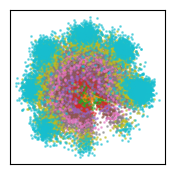

In [16]:
import matplotlib.pyplot as plt



mask = generated_path_discrete[:,-1]==0
mask = mask.squeeze()
plt.figure(figsize=(2, 2))
for i in range(generated_path_continuous.shape[1]):    
    plt.scatter(generated_path_continuous[:, i, 0][mask], generated_path_continuous[:, i, 1][mask], s=1, alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

mask = generated_path_discrete[:,-1]==3
mask = mask.squeeze()

plt.figure(figsize=(4, 4))
plt.scatter(generated_path_continuous[:, 0, 0][mask], generated_path_continuous[:, 0, 1][mask], s=1, c='k', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, 50, 0][mask], generated_path_continuous[:, 50, 1][mask], s=1, c='brown', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, 100, 0][mask], generated_path_continuous[:, 100, 1][mask], s=1, c='darkred', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, 150, 0][mask], generated_path_continuous[:, 150, 1][mask], s=1, c='red', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, 200, 0][mask], generated_path_continuous[:, 200, 1][mask], s=1, c='darkred', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, 250, 0][mask], generated_path_continuous[:, 250, 1][mask], s=1, c='purple', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, -1, 0][mask], generated_path_continuous[:, -1, 1][mask], s=1, c='b', alpha=0.5, cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()